# An Introduction to Plotting and Data Analysis in Python 2
Clyde Fare and João Pedro Malhado, Imperial College London (contact: [python@imperial.ac.uk](python@imperial.ac.uk))

Parts of the material of this notebook have been addapted from work by Andrew McKinley, Nial Jackson and Oliver Robotham. This notebook is licensed under a [Creative Commons Attribution 4.0 (CC-by) license](http://creativecommons.org/licenses/by/4.0/)

## Overview

In this workshop we will cover how to load data from files and we will see how to perform some statistical analysis on this data.
We ill also investigate the properties of statistical distributions which are visualized via histograms, and see how the properties of these distributions relate to basic statistical quantities.

Once more, this is an interactive tutorial - as you go through it any time you see something that looks like this:

    a = "Hello"
   
that's followed by an empty *code cell* (a light grey rectangle with a label like *"In[ ]"*), you should 
type the expression in the code cell, hit Shift+Return to *execute* it, and note the output.

Limit copying and pasting to cells requiring more than 5 lines! You'll learn the concepts better if you type them out yourself.

# Recap from workshop 1

## Notebook

We are working inside an interactive Python Notebook. It is composed of code cells where Python code can be executed and non code cells, where descriptive material can be placed.

The icons at the top of the page allow us to save the page, add new cells, cut, copy and paste cells, move cells up or down, execute the highlighted cell, halt and reset the current python kernel.

We can convert a highlighted cell to a different type of cell using the dropdown menu to the immediate right of the icons.

We can execute a code cell/render a markdown cell with Shift+Return.

If we want to have direct access to the plotting and numerical functions and include our plots directly in the notebook we need to execute

    %pylab inline

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


To help us visualize some of the data we will add another command that sets how many lines is to display variables

    set_printoptions(linewidth=120)

In [2]:
set_printoptions(linewidth=120)

## Variables

Variables, allow us to refer to data objects with names. Before you execute the cell - can you predict the value of z?
    
    x=3
    y=array([1,2,3])
    z=x*y
    z

In [3]:
x=3
y=array([1,2,3])
z=x*y
z

array([3, 6, 9])

## Arrays

Arrays are collections of numbers, that we can operate on collectively and are the containers for our data. There are special commands **linspace** and **arange** for creating arrays.

**linspace** creates arrays of equally spaced numbers where we specify the initial value, the final value and how many numbers we want inbetween

    linspace(-pi, pi, 10)

In [4]:
linspace(-pi, pi,10)

array([-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,  0.34906585,  1.04719755,  1.74532925,
        2.44346095,  3.14159265])

**arange** creates arrays of equally spaced numbers where we specify the initial value, a stop value (that will not be included), and the interval size:
    
    arange(0, 20, 2)

In [5]:
arange(0,20,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

We can refer to elements of the data in an array by using square brackets and the index of the element we want. Remembering the first element corresponds to index zero.

    my_1d_array = arange(0,20,2)
    my_1d_array[0]

In [6]:
my_1d_array = arange(0,20,2)
my_1d_array[0]

0

    my_1d_array[5]

In [7]:
my_1d_array[5]

10

We can also refer to subsets of the data by providing two indices separated by a colon:

    my_1d_array[0:5]

In [8]:
my_1d_array[0:5]

array([0, 2, 4, 6, 8])

Thus the above slice takes element 0 of my_1d_array **up to but not including** element 5.

* If the first index is omitted, the subset will start at the zeroth index.
* If the second index is omitted the subset will extend to the last element

Thus

    my_1d_array[:]

In [9]:
my_1d_array[:]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

We can choose to omit certain elements in our subset by using a second colon and a step size

    my_1d_array[0:10:2]

In [10]:
my_1d_array[0:10:2]

array([ 0,  4,  8, 12, 16])

Arrays can be multidimensional

    my_2d_array = array([[0, 3, 6, 9], [1, 4, 7, 10], [2, 5, 8, 11], [3, 6, 9, 12]])
    my_2d_array

In [11]:
my_2d_array = array([[0,3,6,9],[1,4,7,10],[2,5,8,11],[3,6,9,12]])
my_2d_array

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11],
       [ 3,  6,  9, 12]])

The format for selecting elements from a 2d array is:  

**<span style='color:green'>array_name</span> [ <span style='color:blue'>row_indices</span> <span style='color:red;font-     weight:bold'>,</span> <span style='color:blue'>column_indices</span> ]**


E.g. to select all rows and from them the columns from index 2 up to but not including index 4 would be: 
    
    my_2d_array[:,2:4]

In [12]:
my_2d_array[:,2:4]

array([[ 6,  9],
       [ 7, 10],
       [ 8, 11],
       [ 9, 12]])

We can also include steps. Try to predict what the following command will produce:
    
    my_2d_array[1:4:2,0:3:2]

In [13]:
my_2d_array[1:4:2,0:3:2]

array([[1, 7],
       [3, 9]])

The following diagram summarises the indexing for 2d arrays.

**Make sure you understand everything on this diagram**

<img src="files/numpy_indexing.png" />

We can perform mathematical operations on arrays, which performs the operation on all elements of the array

    sin(my_1d_array)

In [14]:
sin(my_1d_array)

array([ 0.        ,  0.90929743, -0.7568025 , -0.2794155 ,  0.98935825, -0.54402111, -0.53657292,  0.99060736,
       -0.28790332, -0.75098725])

## Plots

We can plot using the **plot** command which accepts many keywords, and display using the **show** command. First we'll create some arrays:

    age = arange(10)
    p_human = age**2
    p_badger = age**3

In [15]:
age = arange(10)
p_human = age**2
p_badger = age**3

    age

In [16]:
age

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    p_human

In [17]:
p_human

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

    p_badger

In [18]:
p_badger

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

Now we will plot the arrays we have created:
    
    plot(age, p_human, linewidth=2.5, linestyle="--", label='Humans')
    plot(age, p_badger, marker='^', color='red', label='Badgers',linestyle='None' )
    title('My reminder plot')
    xlabel('Age')
    ylabel('Power')
    legend()
    show()

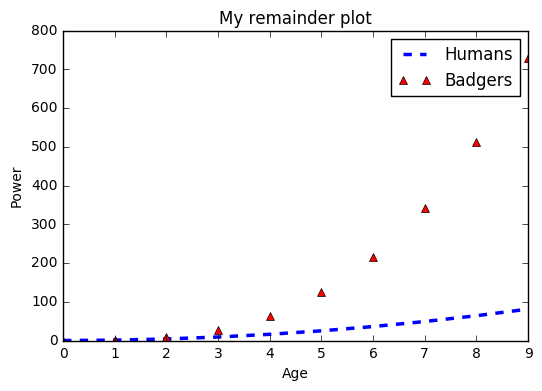

In [19]:
plot(age, p_human, linewidth=2.5, linestyle="--", label='Humans')
plot(age, p_badger, marker='^', color='red', label='Badgers',linestyle='None')
title('My remainder plot')
xlabel('Age')
ylabel('Power')
legend()
show()

# Going further

## Log plot

There are many occasions where we want to plot data on a logarthimic scale. To illustrate this, in the next code cell we define the variable *r_data* with some radioactivity data for the radioactive elements. The first column contains the atomic numbers of the elements and the second column contains the half lives.

In [20]:
r_data = array([[  43,   1.29928320e+14],
               [  61,   5.59133280e+08],
               [  83,   5.99184000e+26],
               [  84,   3.21982560e+09],
               [  85,   2.90160000e+04],
               [  86,   3.30349968e+05],
               [  87,   1.30200000e+03],
               [  88,   5.01422400e+10],
               [  89,   6.87059064e+08],
               [  90,   4.43396160e+17],
               [  91,   1.03400237e+12],
               [  92,   1.40997456e+17],
               [  93,   6.76604880e+13],
               [  94,   2.50080480e+15],
               [  95,   2.32987968e+11],
               [  96,   4.91961600e+14],
               [  97,   4.34881440e+10],
               [  98,   2.84013216e+10],
               [  99,   4.07508192e+07],
               [  100,   8.68320000e+06],
               [  101,   4.44960000e+06],
               [  102,   1.00080000e+04],
               [  103,   3.60000000e+04],
               [  104,   4.71600000e+04],
               [  105,   2.00160000e+04],
               [  106,   6.98400000e+03],
               [  107,   5.40000000e+03],
               [  108,   3.99600000e+03],
               [  109,   1.80000000e+03],
               [  110,   2.40000000e+02],
               [  111,   6.00000000e+02],
               [  112,   2.40000000e+03],
               [  113,   1.20000000e+03],
               [  114,   7.98000000e+01],
               [  115,   6.00000000e+01],
               [  116,   1.20000000e-01],
               [  117,   5.00000000e-02],
               [  118,   5.00000000e-03]])

If we simply plot atomic number versus half life. What we see is not very informative:

    atomic_nos = r_data[:,0]
    half_lives = r_data[:,1]
    plot(atomic_nos, half_lives)
    show()

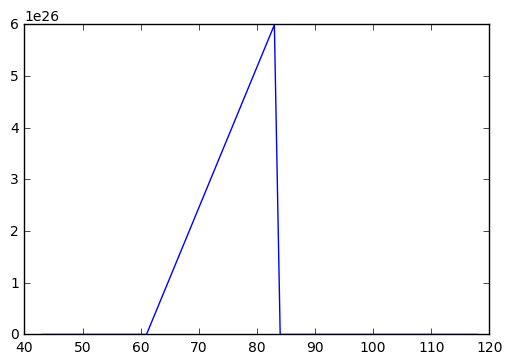

In [21]:
r_data = array([[  43,   1.29928320e+14],
               [  61,   5.59133280e+08],
               [  83,   5.99184000e+26],
               [  84,   3.21982560e+09],
               [  85,   2.90160000e+04],
               [  86,   3.30349968e+05],
               [  87,   1.30200000e+03],
               [  88,   5.01422400e+10],
               [  89,   6.87059064e+08],
               [  90,   4.43396160e+17],
               [  91,   1.03400237e+12],
               [  92,   1.40997456e+17],
               [  93,   6.76604880e+13],
               [  94,   2.50080480e+15],
               [  95,   2.32987968e+11],
               [  96,   4.91961600e+14],
               [  97,   4.34881440e+10],
               [  98,   2.84013216e+10],
               [  99,   4.07508192e+07],
               [  100,   8.68320000e+06],
               [  101,   4.44960000e+06],
               [  102,   1.00080000e+04],
               [  103,   3.60000000e+04],
               [  104,   4.71600000e+04],
               [  105,   2.00160000e+04],
               [  106,   6.98400000e+03],
               [  107,   5.40000000e+03],
               [  108,   3.99600000e+03],
               [  109,   1.80000000e+03],
               [  110,   2.40000000e+02],
               [  111,   6.00000000e+02],
               [  112,   2.40000000e+03],
               [  113,   1.20000000e+03],
               [  114,   7.98000000e+01],
               [  115,   6.00000000e+01],
               [  116,   1.20000000e-01],
               [  117,   5.00000000e-02],
               [  118,   5.00000000e-03]])
atomic_nos = r_data[:,0]
half_lives = r_data[:,1]
plot(atomic_nos, half_lives)
show()

If we take a look at the half lives we can see why:
    
    half_lives

In [22]:
half_lives

array([  1.29928320e+14,   5.59133280e+08,   5.99184000e+26,   3.21982560e+09,   2.90160000e+04,   3.30349968e+05,
         1.30200000e+03,   5.01422400e+10,   6.87059064e+08,   4.43396160e+17,   1.03400237e+12,   1.40997456e+17,
         6.76604880e+13,   2.50080480e+15,   2.32987968e+11,   4.91961600e+14,   4.34881440e+10,   2.84013216e+10,
         4.07508192e+07,   8.68320000e+06,   4.44960000e+06,   1.00080000e+04,   3.60000000e+04,   4.71600000e+04,
         2.00160000e+04,   6.98400000e+03,   5.40000000e+03,   3.99600000e+03,   1.80000000e+03,   2.40000000e+02,
         6.00000000e+02,   2.40000000e+03,   1.20000000e+03,   7.98000000e+01,   6.00000000e+01,   1.20000000e-01,
         5.00000000e-02,   5.00000000e-03])

We see that they range from 10<sup>-3</sup> for Ununoctium to 10<sup>26</sup> seconds for Bismuth - 29 orders of magnitude! Because of this guargantuan range of values plotting the raw data reveals almost nothing. The plot is dominated by the half life of Bismuth and none of the other variation is visible.

If we scale the y-axis so that it is logarithmic i,e the units are orders of magnitude then we should have a much better way to visualize the data. We can use the **xscale** and **yscale** functions to do this.

    yscale('log')
    plot(atomic_nos, half_lives, marker='o')
    show()

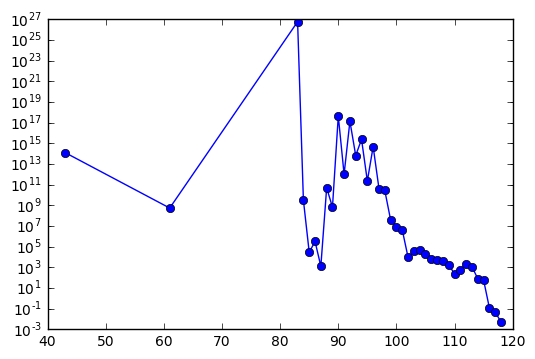

In [23]:
yscale('log')
plot(atomic_nos, half_lives, marker='o')
show()

Which allows us a much better visualization of the data.

The above is equivalent to

    plot(atomic_nos, log10(half_lives), marker='o')
    show()

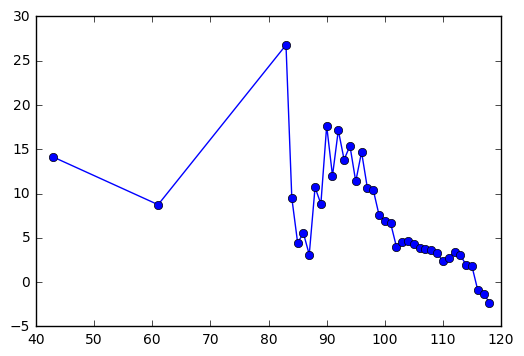

In [24]:
plot(atomic_nos, log10(half_lives), marker='o')
show()

A plot using logarithmic scaling for one axis and normal linear scaling for another is known as a semi-log plot. It is also possible to create a log-log plot by scaling both axis. This can be useful to pull out linear relationships in otherwise non-linear data. We will see an example of this in workshop 3.

## Reading and writing data to files

The most common use case you will have when plotting data is plotting data that has been generated else where.  Most modern measuring instruments will be coupled to a computer or otherwise will be able to store your data in a file. **You should always aim to store your measurement data in a text file**. That means you need a way to load data into a notebook.

There are severeal ways of doing this, the simplest is **loadtxt**

This loads data from text files, provided the data layed out in a regular format. If you take a look at the file [data.txt](./data.txt) which is in the same directory as this notebook. You will see each lines contains numbers separated by spaces.

loadtxt will load this data into an array for us via:

    our_data = loadtxt("data.txt")

In [25]:
our_data = loadtxt("data.txt")

    our_data

In [26]:
our_data

array([[  1.20000000e-06,   8.47000000e+01,   8.30000000e+01,   8.84000000e+00],
       [  4.80000000e-06,   7.78000000e+01,   7.67000000e+01,   7.62000000e+01],
       [  1.56000000e-05,   4.34000000e+01,   4.31000000e+01,   4.35000000e+01],
       [  2.50000000e-05,   2.32000000e+01,   2.31000000e+01,   2.29000000e+01],
       [  3.36000000e-05,   1.72000000e+01,   1.73000000e+01,   1.74000000e+01],
       [  6.00000000e-05,   6.10000000e+00,   6.10000000e+00,   5.80000000e+00],
       [  8.04000000e-05,   4.60000000e+00,   4.50000000e+00,   4.70000000e+00],
       [  9.98000000e-05,   3.60000000e+00,   3.70000000e+00,   3.60000000e+00],
       [  1.21000000e-04,   3.10000000e+00,   3.20000000e+00,   2.90000000e+00],
       [  1.49000000e-04,   2.60000000e+00,   2.80000000e+00,   2.90000000e+00],
       [  1.80000000e-04,   2.40000000e+00,   2.50000000e+00,   2.40000000e+00],
       [  2.01000000e-04,   2.20000000e+00,   2.20000000e+00,   2.20000000e+00]])

We could load a text file seperated by commas like [data2.txt](./data2.txt) via:
    
    loadtxt("data2.txt", delimiter=',')

In [27]:
loadtxt("data2.txt", delimiter=',')

array([[  1.20000000e-06,   8.47000000e+01,   8.30000000e+01,   8.84000000e+00],
       [  4.80000000e-06,   7.78000000e+01,   7.67000000e+01,   7.62000000e+01],
       [  1.56000000e-05,   4.34000000e+01,   4.31000000e+01,   4.35000000e+01],
       [  2.50000000e-05,   2.32000000e+01,   2.31000000e+01,   2.29000000e+01],
       [  3.36000000e-05,   1.72000000e+01,   1.73000000e+01,   1.74000000e+01],
       [  6.00000000e-05,   6.10000000e+00,   6.10000000e+00,   5.80000000e+00],
       [  8.04000000e-05,   4.60000000e+00,   4.50000000e+00,   4.70000000e+00],
       [  9.98000000e-05,   3.60000000e+00,   3.70000000e+00,   3.60000000e+00],
       [  1.21000000e-04,   3.10000000e+00,   3.20000000e+00,   2.90000000e+00],
       [  1.49000000e-04,   2.60000000e+00,   2.80000000e+00,   2.90000000e+00],
       [  1.80000000e-04,   2.40000000e+00,   2.50000000e+00,   2.40000000e+00],
       [  2.01000000e-04,   2.20000000e+00,   2.20000000e+00,   2.20000000e+00]])

We will now modify the data we just loaded by shifting all the values by -2 and save it back to a file.

    modified_data = our_data - 2

In [28]:
modified_data = our_data -2

In order to save the modified data array we can use the command **savetxt**, which works analagously to loadtxt thus
    
    savetxt('my_data_file.txt', modified_data)

In [29]:
savetxt('my_data_file.txt', modified_data)

Creates the file my_data_file.txt, with the data values separated by spaces.

If we wanted data separated by commas we would use:
    
    savetxt('my_data_file2.txt', modified_data, delimiter=',')

In [30]:
savetxt('my_data_file2.txt', modified_data, delimiter=',')

Take a look at the two files you've just produced: [my_data_file.txt](./my_data_file.txt) and [my_data_file2.txt](./my_data_file2.txt)

## Basic statistics

Lets load up a data set and plot a histogram of the data

    d=loadtxt('d1.txt')
    hist(d)
    show()

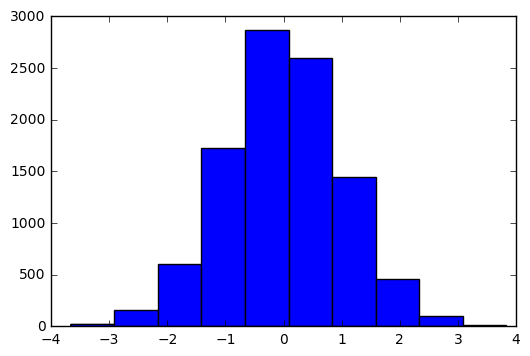

In [31]:
d=loadtxt('d1.txt')
hist(d)
show()

Histograms tell us how many data points there are in a particular range of the data. By default the *hist* command creates 10 bins, equally spaced between the lowest value in the data set and the highest value in the dataset.

We can use the functions **min** and **max** to find the largest and smallest values in an array.

    min(d)

In [32]:
min(d)

-3.6605563357283502

    max(d)

In [33]:
max(d)

3.8335002680871493

Armed with these values we can check our histogram makes sense. We said before there were 10 bins by default, now that we know the maximum and minimum values we can see that the bin size must be:
    
    ( max(d) - min(d) )/10

In [34]:
(max(d)-min(d))/10

0.74940566038154999

(Note we had to use brackets because we want the subtraction to occur before the division.)

The width of each bin is about 0.75 and we start at about -3.66 and end at about 3.8. Look at the above histogram and make sure that this makes sense - where do you expect the third bin from left to start?

We can change the number of bins using the the bin keyword:
    
    hist(d, bins=22)
    show()

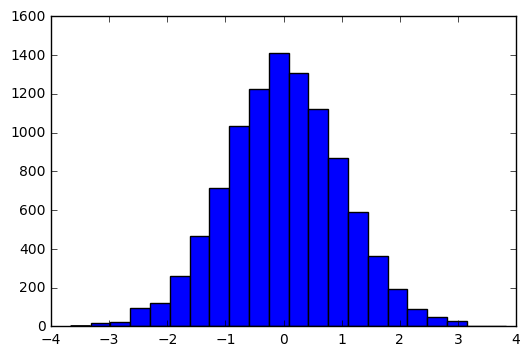

In [35]:
hist (d, bins=22)
show()

There are many options to customise histograms, we won't go through them all. But this is a good point to demonstrate a way to use the built in help system. We can automatically get more information on a particular function by typing the function followed by a question mark:
    
    hist?

In [36]:
hist?

This pops up a footer window that has lots of information. It defines all the keywords and explains what form they take and what their effect is. You won't yet be able to understand everything that the helper utility tells you but it can still be a very useful resource. 

Another way to get the same information, is to type the function name (**hist** in this case) and then press the key combination SHIFT+TAB. Try it in the cell below:

In [37]:
hist

<function matplotlib.pyplot.hist>

This will create a floating pop up with the same information, you can press the plus icon in the top right of the popup to expand. If you want to reopen the pop up you can simply delete the first opening parenthesis and put it back. Try it on the line above.

Loading pylab gives us access to basic statistical functions like the sample mean, defined as

$$\bar{x}=\frac{\sum_i^N x_i}{N} ,$$

where $x_i$ is the value of each element and $N$ is the total number of data points.

    mean(d)

In [38]:
mean(d)

0.0012779182417756133

The median:
   
   
    median(d)

In [39]:
median (d)

-0.00093007149785138315

The sample standard deviation defined as

$$s_x=\sqrt{\frac{\sum_i^N(x_i-\bar{x})^2}{N-1}}$$
    
    std(d,ddof=1)

In [40]:
std(d,ddof=1)

1.0000958183229058

Note the *ddof=1* parameter set above which relates to the $N-1$ term in the denominator in the definition of standard deviation. Different values of *ddof* have different statistical meaning. We will be dealing exclusivelly with *ddof=1*.

The percentile:
    
    first_q = percentile(d,25)
    third_q = percentile(d,75)

In [41]:
first_q = percentile (d,25)
third_q = percentile (d,75)

That can be used to compute the interquartile range:
    
    third_q - first_q

In [42]:
third_q-first_q

1.3291547334177034

The **standard error of the mean** $\sigma_{\bar{x}}$ is an important quantity which we will see again in the exercise below. It expresses how uncertain we are in the mean value we have computed. When reporting an estimate resulting from several measurements, we should use $\bar{x} \pm \sigma_{\bar{x}} units$.

We can calculate the standard error from the standard deviation and the square root of the number of elements:

$$\sigma_{\bar{x}}=\frac{s_x}{\sqrt{N}}=\sqrt{\frac{\sum_i^N (x_i-\bar{x})^2}{N(N-1)}}$$

To compute the number of elements we need another built-in function **len**

    no_elements = len(d)
    std(d,ddof=1)/no_elements**0.5

In [43]:
no_elements = len(d)
std(d,ddof=1)/no_elements**0.5

0.010000958183229058

We can also perform these statistical measures on 2d arrays (i.e. matrices), we'll make a 2d array using a function **randn**. This generates arrays of random numbers, to make a 5x5 array of random numbers we would use

    m=randn(5,5)
    m

In [44]:
m=randn(5,5)
m

array([[  1.00406235e+00,  -3.71919552e-01,  -4.73242946e-01,   1.90976716e-01,   4.70996724e-01],
       [ -1.04693257e-01,   2.09879749e-01,   7.58946480e-01,   1.70954046e-01,  -4.79406256e-01],
       [ -5.63485047e-01,  -1.27414293e+00,  -1.44307698e+00,   1.12824968e+00,  -3.63274543e-01],
       [ -1.29314348e+00,   9.19490830e-01,   1.50462162e-01,   6.34479095e-01,  -1.42506593e-03],
       [ -1.21772258e+00,   1.17021585e+00,  -4.79130549e-02,  -2.03724239e+00,  -1.17291778e-02]])

If we take the mean directly we get the mean of all the numbers in the matrix, in much the same way that we would for a 1d array:
    
    mean(m)

In [45]:
mean(m)

-0.11494814313096433

However with a matrix we have the possibility to compute the means of all the columns, or all the rows individually. We do this with the axis keyword. To compute the mean of each column we would use:<a id="axis"></a>
    
    mean(m, axis=0)

In [46]:
mean(m,axis=0)

array([-0.4349964 ,  0.13070479, -0.21096487,  0.01748343, -0.07696766])

This gives us an array where the first element is the mean of the first column of the 2d array, the second element is the mean of the second column of the 2d array etc.

Likewise to compute the mean of each row we would use:
    
    mean(m, axis=1)

In [47]:
mean(m, axis=1)

array([ 0.16417466,  0.11113615, -0.50314596,  0.08197271, -0.42887827])

The same is true of the other statistical functions.

    std(m, ddof=1, axis=1)

In [48]:
std(m, ddof=1,axis=1)

array([ 0.61113985,  0.45505752,  1.02011803,  0.85283211,  1.23342616])

## Filtering data

In addition to the many ways to access the elements of an array that we covered in the previous workshop there is a final method that is very useful. Here we access a subset of the data not by specifying the *indices* we want to include but instead by specifying their *values*. Thus we can select all elements of an array that are greater than a certain value. This is very useful to filter data in order to remove spurious values and outliers. Recalling that d is the dataset we loaded above. To select all values larger than 3 we use:
    
    d[d>3]

In [49]:
d[d>3]

array([ 3.01837236,  3.19344964,  3.19707273,  3.49930068,  3.3513463 ,  3.07832102,  3.13433592,  3.0334986 ,
        3.83350027,  3.05235314,  3.1013366 ,  3.08489535,  3.34593209,  3.73545676,  3.09657408,  3.0010193 ])

This can be combined with the statistical functions, thus to select data above the mean we would use:
    
    large_d = d[d>mean(d)]
    hist(large_d,bins=22, range=array([-4,4]))
    show()

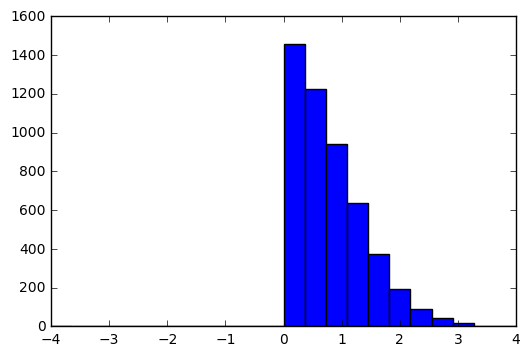

In [50]:
large_d = d[d>mean(d)]
hist(large_d,bins=22, range=array([-4,4]))
show()

We can chain the filtering process. Thus to select the data inside the interquartile range we first select the data that is above the 25th percentile:
    
    q1 = percentile(d,25)
    last_75_d = d[d>q1]
    hist(last_75_d, bins=22, range=array([-4,4]))
    show()

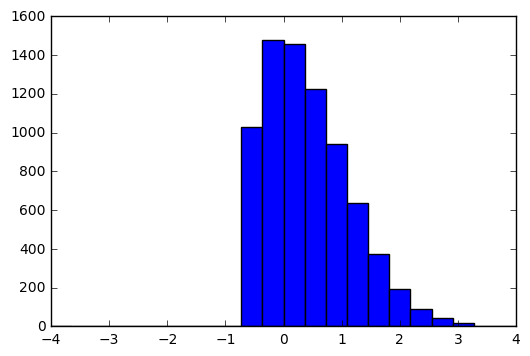

In [51]:
q1 = percentile(d,25)
last_75_d = d[d>q1]
hist(last_75_d, bins=22,range=array([-4,4]))
show()

And then of that we select the data that is below the 75th percentile:
    
    q3 = percentile(d,75)
    mid_d = last_75_d[last_75_d<q3]
    hist(mid_d, bins=22, range=array([-4,4]))
    show()

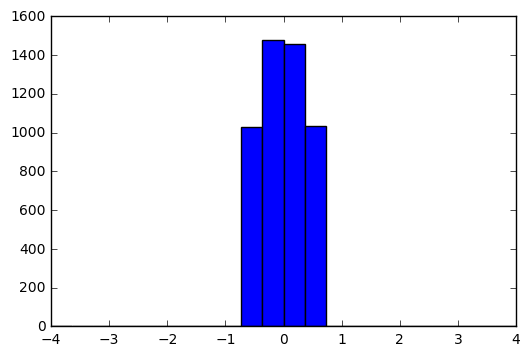

In [52]:
q3=percentile(d,75)
mid_d = last_75_d[last_75_d<q3]
hist(mid_d, bins=22, range=array([-4,4]))
show()

Thus far we have been filtering a 1 dimensional array but the filering process works just as well if we have a two dimensional array, when we discussed the *loadtxt* function above we loaded some data to a variable named 'our_data':

    our_data

In [53]:
our_data

array([[  1.20000000e-06,   8.47000000e+01,   8.30000000e+01,   8.84000000e+00],
       [  4.80000000e-06,   7.78000000e+01,   7.67000000e+01,   7.62000000e+01],
       [  1.56000000e-05,   4.34000000e+01,   4.31000000e+01,   4.35000000e+01],
       [  2.50000000e-05,   2.32000000e+01,   2.31000000e+01,   2.29000000e+01],
       [  3.36000000e-05,   1.72000000e+01,   1.73000000e+01,   1.74000000e+01],
       [  6.00000000e-05,   6.10000000e+00,   6.10000000e+00,   5.80000000e+00],
       [  8.04000000e-05,   4.60000000e+00,   4.50000000e+00,   4.70000000e+00],
       [  9.98000000e-05,   3.60000000e+00,   3.70000000e+00,   3.60000000e+00],
       [  1.21000000e-04,   3.10000000e+00,   3.20000000e+00,   2.90000000e+00],
       [  1.49000000e-04,   2.60000000e+00,   2.80000000e+00,   2.90000000e+00],
       [  1.80000000e-04,   2.40000000e+00,   2.50000000e+00,   2.40000000e+00],
       [  2.01000000e-04,   2.20000000e+00,   2.20000000e+00,   2.20000000e+00]])

We will now filter this data, taking only the lines where the values in the second column are greater than 5:
    
    column_2 = our_data[:,1]
    our_data[column_2>5]

In [54]:
column_2 = our_data[:,1]
our_data[column_2>5]

array([[  1.20000000e-06,   8.47000000e+01,   8.30000000e+01,   8.84000000e+00],
       [  4.80000000e-06,   7.78000000e+01,   7.67000000e+01,   7.62000000e+01],
       [  1.56000000e-05,   4.34000000e+01,   4.31000000e+01,   4.35000000e+01],
       [  2.50000000e-05,   2.32000000e+01,   2.31000000e+01,   2.29000000e+01],
       [  3.36000000e-05,   1.72000000e+01,   1.73000000e+01,   1.74000000e+01],
       [  6.00000000e-05,   6.10000000e+00,   6.10000000e+00,   5.80000000e+00]])

## Tutorial exercise

In this exercise we'll be dealing with larger datasets, such as those you could have obtained from an automatic measuring instrument, and looking at some statistical properties of sets of measurements.

The file measurements.csv contains the data we will be analysing in these exercises. (CSV stands for [comma separated values](https://en.wikipedia.org/wiki/Comma-separated_values), which is a type of text file commonly used in porting data between programs or instruments.) 

The file contains 5 columns of data corresponding to 100,000 repeated measurements of the same system using 5 different measuring instruments (good thing we don't have to analyse this data by hand!)

* Have a look at the file content **using a text editor such as notepad**, and load the file data into a variable. Output the value of the variable to see how the imported data looks like.

In [55]:
m=loadtxt("measurements.csv",delimiter=',')
m

array([[ 2.67639,  4.63882,  9.12019,  6.11231,  1.65725],
       [ 1.9729 ,  4.2014 ,  8.44065,  5.86229,  1.48369],
       [ 2.12621,  2.48734,  9.27098,  4.5784 ,  1.22592],
       ..., 
       [ 2.78484,  3.43476,  8.61616,  3.5069 ,  1.47011],
       [ 3.202  ,  3.27713,  8.46519,  2.74675,  1.5416 ],
       [ 3.29869,  3.711  ,  8.52088, -0.27787,  1.45626]])

A quick and informative way of acquiring an overall view of the data distribution is to plot histograms.

* On the same figure, plot 5 histograms of 100 bins for each of the 5 sets of data.
* Label the figure and make sure the it is of reasonable size and a legend is present.
* Set the *range* keyword of each histogram to be equal such that all histograms are visible, and set the transparency *alpha* keyword to a value less than 1.

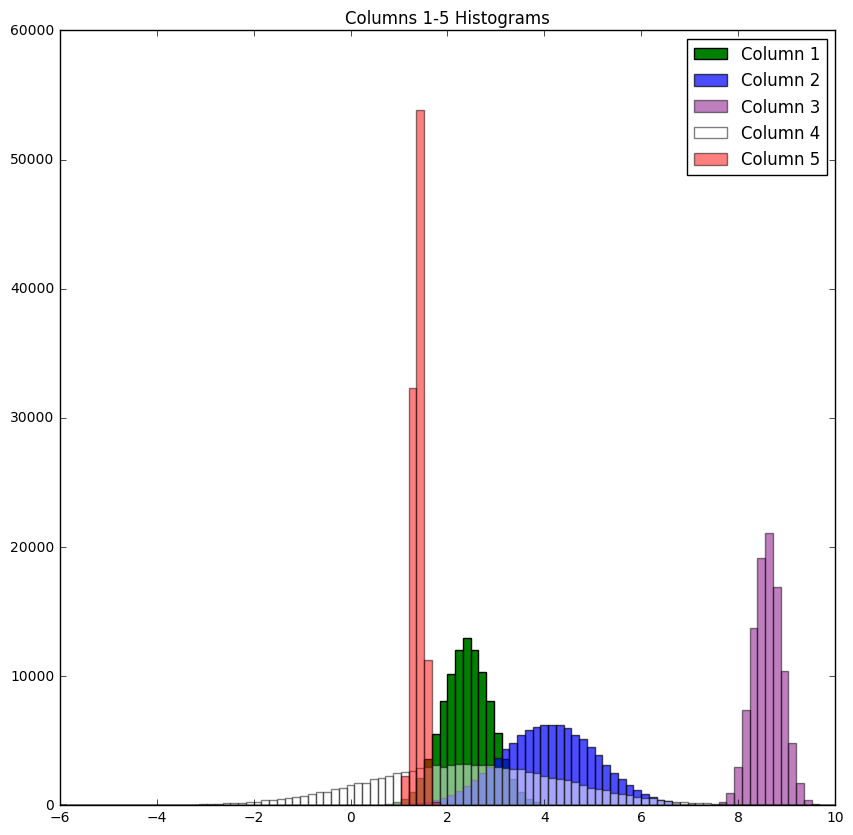

In [56]:
figure(figsize=(10,10))
col1=m[:,0]
col2=m[:,1]
col3=m[:,2]
col4=m[:,3]
col5=m[:,4]
hist(col1, bins=100, color='green', label="Column 1", alpha=1,range=array([-6,10]))
hist(col2, bins=100,label="Column 2",alpha=0.7,range=array([-6,10]) )
hist(col3, bins=100,color='purple',label="Column 3",alpha=0.5,range=array([-6,10]) )
hist(col4, bins=100,color='white',label="Column 4",alpha=0.5,range=array([-6,10]) )
hist(col5, bins=100,color='red', label="Column 5",alpha=0.5, range=array([-6,10]) )
title('Columns 1-5 Histograms')
legend()
show()

Measurements are subject to noise thus two consecutive measurements of the same system are unlikely to give exactly the same result even if the system is unchanged, we see this in our dataset.

The *mean* $\bar{x}$ of a set of independent measurements of some property $x$ is the best estimate of the actual value of that property. As we will see below, the precision of this estimate can be improved by increasing the number of measurements we are averaging over. 

The *standard deviation* $s_x$ quantifies the spread of the experimental measurements about its mean value. (It corresponds to the average error of a single measurement. When writing up experiments you will often report the mean of some set of measurements +/- some error value, it is important to note that the standard deviation is **not** this error value - below we will examine what this error is in more detail.)

* For each of the 5 datasets, calculate the mean and the standard deviation (don't forget to set the appropriate *ddof* value). Using the keyword <a href="#axis" style="font-style:italic">axis</a> could be useful in this context.

* How do the $\bar{x}$ and $s_x$ values relate the shape of the distributions in the histograms?

* Construct another figure containing the histograms as above but with the following addition: using the mean values you have calculated, add vertical lines marking out the position of the mean for the 5 distributions.

In [57]:
avgm=mean(m, axis=0)
avgm

array([ 2.40064633,  4.10132553,  8.59968518,  2.40290345,  1.39988773])

In [58]:
std(m,ddof=1, axis=0)

array([ 0.50019769,  0.99932675,  0.30025538,  2.00385668,  0.10022311])

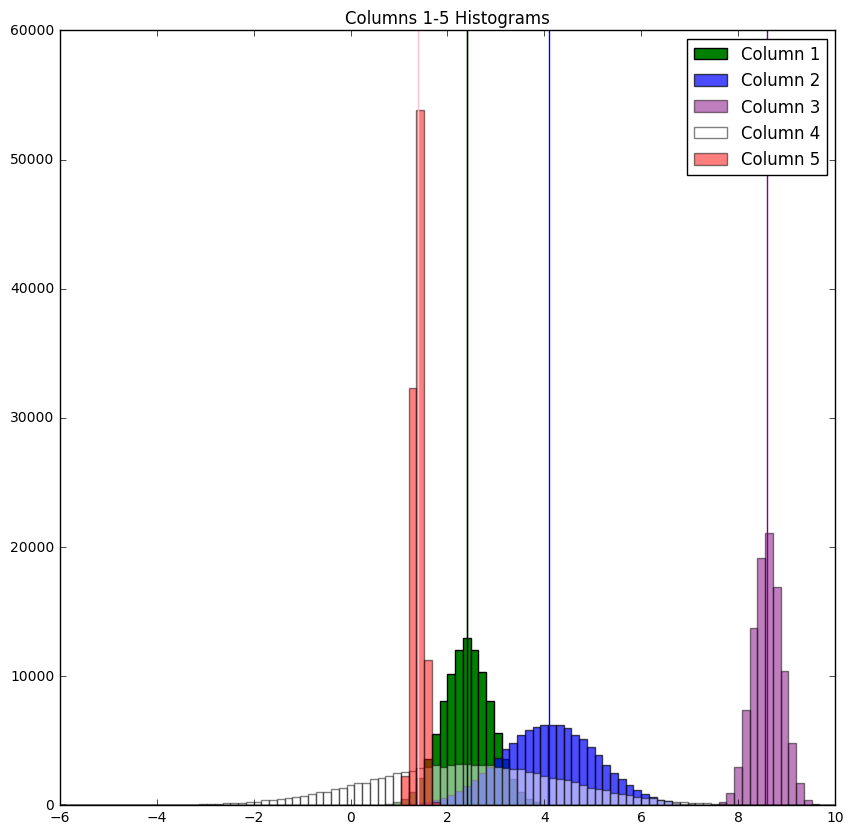

In [59]:
figure(figsize=(10,10))
col1=m[:,0]
col2=m[:,1]
col3=m[:,2]
col4=m[:,3]
col5=m[:,4]
hist(col1, bins=100, color='green', label="Column 1", alpha=1,range=array([-6,10]))
hist(col2, bins=100,label="Column 2",alpha=0.7,range=array([-6,10]) )
hist(col3, bins=100,color='purple',label="Column 3",alpha=0.5,range=array([-6,10]) )
hist(col4, bins=100,color='white',label="Column 4",alpha=0.5,range=array([-6,10]) )
hist(col5, bins=100,color='red', label="Column 5",alpha=0.5, range=array([-6,10]) )
x1=array([avgm[0],avgm[0]])
x2=array([avgm[1],avgm[1]])
x3=array([avgm[2],avgm[2]])
x4=array([avgm[3],avgm[3]])
x5=array([avgm[4],avgm[4]])
y1=array([0,60000])
plot(x1,y1, color='green')
plot(x2,y1, color='blue')
plot(x3,y1, color='purple')
plot(x4,y1, color='black')
plot(x5,y1, color='pink')
title('Columns 1-5 Histograms')
legend()
show()

We will now study how some statistical properties vary with sample size.

* For the 1st dataset, construct three histograms on a single figure - one with all 100,000 measurements, one for the first 10,000 measurements, and another for the first 1,000 measurements.

* Change the figure so that the histograms are normalized (you will need to use the built in tools to discover the appropriate keyword of function **hist** to achieve this).

By looking at these three histograms, and by calculating their means and standard deviations, what do you notice about how much the mean value, and the standard deviation change as the sample size grows? (Bear in mind that all these sample sizes are fairly large.)

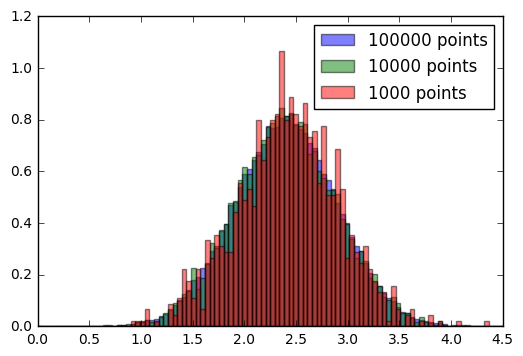

In [60]:
set2=col1[0:10001]
set3=col1[0:1001]
hist(col1, bins=100, range=array([0,4.5]),normed=True, alpha=0.5, label="100000 points")
hist(set2, bins=100, range=array([0,4.5]),normed=True, alpha=0.5, label="10000 points")
hist(set3, bins=100, range=array([0,4.5]),normed=True, alpha=0.5, label="1000 points")
legend()
show()

In [61]:
mean(col1)

2.4006463272

In [62]:
std(col1, ddof=1)

0.50019769288743854

In [63]:
mean(set2)

2.3983240445955403

In [64]:
std(set2, ddof=1)

0.49764834868735336

In [65]:
mean(set3)

2.4203658441558442

In [66]:
std(set3, ddof=1)

0.4893212593954116

The statistical uncertainty associated with the mean value is given by the *standard error of the mean* $\sigma_{\bar{x}}$ defined above. This is the value that should be reported as the statistical error of your measurements.

Let us investigate how this quantity varies with sample size. We will be considering data from instruments 1 and 4, these have similar mean value as you should see in your histograms above.

* For datasets 1 and 4, choose 5 sample sizes between 1000 and 100,000 calculate the standard deviation and the standard error.

* For the two datasets above, plot the standard deviation and standard error as a function of sample size. (Make sure your plot extends to the maximum sample size of 100,000. You may want to use a logarithmic *y* scale in this plot.)

* What does this plot tell you about the usefulness of repeating the same measurement?

In [67]:
set4=col1[0:5001]
set5=col1[0:50001]
set7=col4[0:10001]
set8=col4[0:1001]
set9=col4[0:5001]
set10=col4[0:50001]

In [68]:
standard_error1=(std(col1))/(sqrt(100000))
standard_error1

0.0015817560810459888

In [69]:
standard_error2=(std(set2))/(sqrt(10000))
standard_error2

0.0049762346813594475

In [70]:
standard_error3=(std(set3))/(sqrt(1000))
standard_error3

0.015465965821684535

In [71]:
std(set4,ddof=1)

0.50123512076986154

In [72]:
standard_error4=std(set4)/(sqrt(5000))
standard_error4

0.00708782631010912

In [73]:
std(set5,ddof=1)

0.4988531358127713

In [74]:
standard_error5=(std(set5))/(sqrt(50000))
standard_error5

0.0022309167358767691

In [75]:
std(col4,ddof=1)

2.003856678727896

In [76]:
standard_error6=(std(col4))/(sqrt(100000))
standard_error6

0.0063367195254851738

In [77]:
std(set7,ddof=1)

2.0256772711117605

In [78]:
standard_error7=(std(set7))/(sqrt(10000))
standard_error7

0.020255759948438617

In [79]:
std(set8,ddof=1)

2.0236795420856852

In [80]:
standard_error8=(std(set8))/(sqrt(1000))
standard_error8

0.063962392867643506

In [81]:
std(set9,ddof=1)

2.0159920307490782

In [82]:
standard_error9=(std(set9))/sqrt(5000)
standard_error9

0.028507582099527945

In [83]:
std(set10,ddof=1)

2.0126189332200686

In [84]:
standard_error10=(std(set10))/sqrt(50000)
standard_error10

0.0090006154892615011

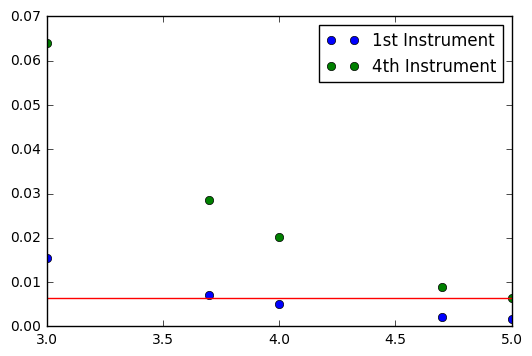

In [85]:
y_5=array([100000,10000,1000,5000,50000])
x_5=array([standard_error1,standard_error2, standard_error3,standard_error4, standard_error5,])
x2_5=array([standard_error6,standard_error7,standard_error8,standard_error9,standard_error10])
plot(log10(y_5),x_5,linestyle='', marker='o', label='1st Instrument')
plot(log10(y_5),x2_5, linestyle='', marker='o', label='4th Instrument')
plt.axhline(y=(0.0063367195254851738), xmin=0, xmax=100000, color='red')
legend()
show()

* By drawing a horizontal line in the plot above, do a rough estimate of what sample size is needed to achieve the same precision using measuring instrument 1, as is obtained using measuring instrument 4 with 100,000 measurements.

In [94]:
10**3.9

7943.282347242814

As a final note, from the definition of standard error and the study we just carried out, what is the limit of the standard error value as the sample size goes to infinity? 

Although this statistical error vanishes for infinite sample sizes, this does not mean you can achieve absolute confidence in your measurements by taking an extremely large number of repetitions. 

The standard error quantifies our uncertainty due to the presence of random noise. As we have seen we can combat this using a sufficiently large sample size making our estimate more and more precise. There is however a second form of error that influences the accuracy of our estimate and this form is not reduced through repetition: *systematic error*. This corresponds to imperfect/faulty operation of the instruments or miscalibration.

Looking at the data produced by our five instruments we see that all the instruments are affected by noise (instrument 5 being the most precise) but that instruments two three and five suffer from systematic errors which push the mean value of their measurements away from the actual value of the system (~2.4) which is correctly captured by instruments one and four. 

Systematic errors need to be estimated and corrected for based on knowledge of the measurement process and instruments used.

## Summary

We reviewed the basic principles of storing and accessing data in arrays and how to plot that data. We looked at how a logarithmic scale can be used to visualize measurements spanning several orders of magnitude. We saw how to load data from, and save data to text files (most instruments should be able to export data in the form of text files). We have seen how simple statistical quantities of data sets can be calculated.

We have also looked at the properties of statistical distributions for big sample sizes, and how statistical quantities such as the mean (distribution centre), sample standard deviation (distribution width) and standard error of the mean (uncertainty on the value of the mean) charaterise these distributions.